<h3>Introduction:</h3>

<b>Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.</b>
<br>
According to the information provided in the README file, Pulsars are a rare type of neutron stars that are useful as probes of space-time, interstellar medium, and states of matter. They are searched for by looking for radio signals using telescopes. It is hard to distinguish between signals caused by either RFI (Radio 
Frequency Interference) or noise and real pulsars. Thus the above is a classification problem of identifying pulsar and non-pulsar classes based on certain variables.

<b>Clearly state the question you will try to answer with your project</b>
<br>
Our goal is to perform dataset classification to classify pulsar candidates into pulsar or non-pulsar categories to facilitate the exploration and identification of pulsars through data science techniques.</b>
The question : Based on certain characteristic variables, is a given candidate pulsar or non-pulsar?
<br>

<b>Identify and describe the dataset that will be used to answer the question</b>
- We will be using the Dataset available at this link: https://archive.ics.uci.edu/dataset/372/htru2
- Here is the citation for the dataset: 
R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar. Candidate Selection: From simple filters to a new principled real-time classification approach MNRAS, 2016.

- The title is HTRU2 and the dataset contains 17898 observations and the following 8 variables as described in the dataset README file:
    - Mean of the integrated profile.
    - Standard deviation of the integrated profile.
    - Excess kurtosis of the integrated profile.
    - Skewness of the integrated profile.
    - Mean of the DM-SNR curve.
    - Standard deviation of the DM-SNR curve.
    - Excess kurtosis of the DM-SNR curve.
    - Skewness of the DM-SNR curve.
- An additional dummy/categorical variable column indicates whether or not the observation has been classified as a pulsar (class == 1) or not (class == 0)
- The sample has a balance problem since there are only 1639 real pulsar examples and an overwhelming 16259 non pulsar examples (RFI/noise). This will need to be accounted for in the analysis.


<h3> Preliminary exploratory data analysis:</h3>

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


In [71]:
# Loading the libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

# Reading data from url
url <- "https://raw.githubusercontent.com/aravic03/group-project-proposal/main/HTRU_2.csv"
pulsar_data <- read_csv(url,
                       col_names = c("mean_ip", "standard_deviation_ip", 
                                      "excess_kurtosis_ip", "skewness_ip",
                                      "mean_c", "standard_deviation_c", 
                                      "excess_kurtosis_c", "skewness_c",
                                      "is_pulsar"
                                     )) |>
               mutate(is_pulsar = as_factor(is_pulsar))
     
pulsar_data

# Splitting the data into training and testing sets (75% and 25%)
pulsar_data_split <- initial_split(pulsar_data, prop = 0.75, strata = is_pulsar)
pulsar_training <- training(pulsar_data_split)
pulsar_testing <- testing(pulsar_data_split)

# Summarizing the overall data
pulsar_distribution <- pulsar_data |>
       group_by(is_pulsar) |>
       summarize(n())
pulsar_distribution

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_ip, standard_deviation_ip, excess_kurtosis_ip, skewness_ip, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_ip,standard_deviation_ip,excess_kurtosis_ip,skewness_ip,mean_c,standard_deviation_c,excess_kurtosis_c,skewness_c,is_pulsar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


is_pulsar,n()
<fct>,<int>
0,16259
1,1639


is_pulsar,n()
<fct>,<int>
0,12201
1,1222


mean_ip,standard_deviation_ip,excess_kurtosis_ip,skewness_ip,mean_c,standard_deviation_c,excess_kurtosis_c,skewness_c
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
111.0384,46.54597,0.4778146,1.765109,12.5035,26.23804,8.31305,104.7388


mean_ip,standard_deviation_ip,excess_kurtosis_ip,skewness_ip,mean_c,standard_deviation_c,excess_kurtosis_c,skewness_c,is_pulsar
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


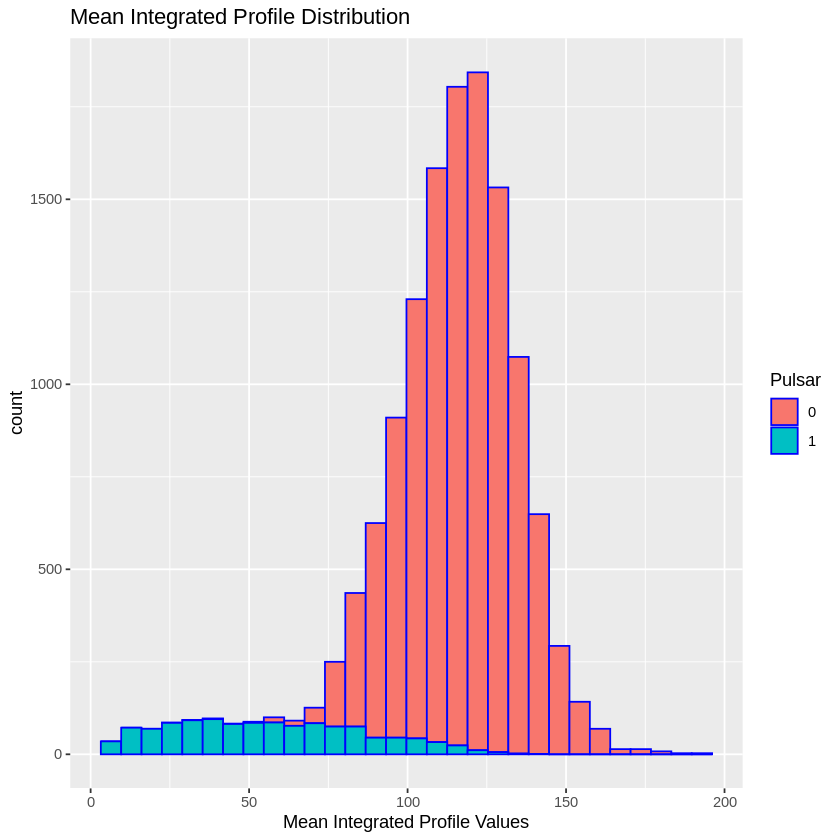

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


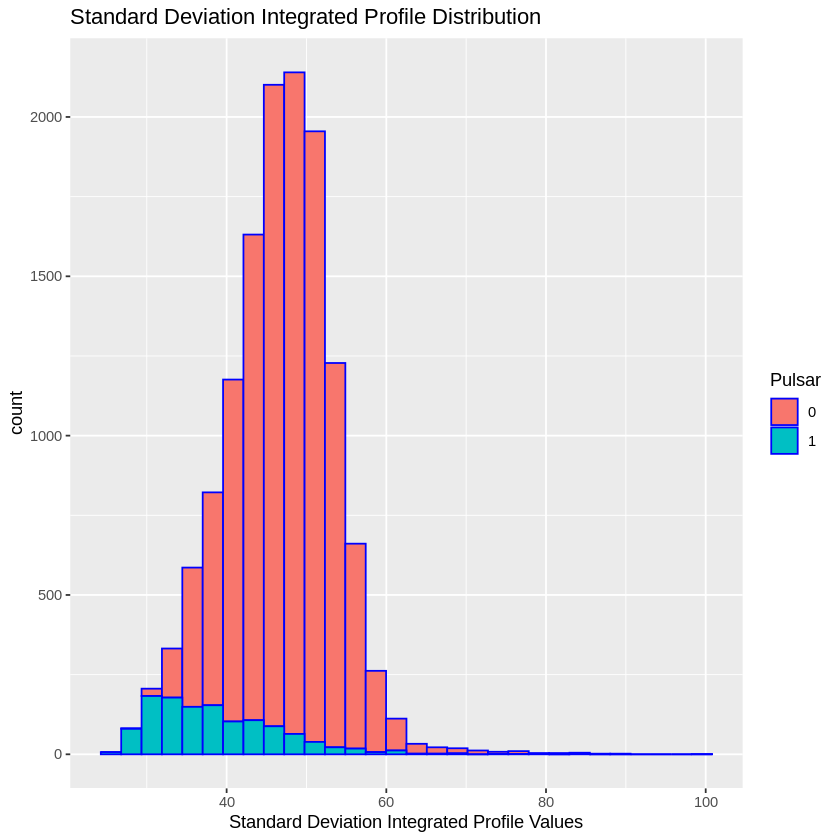

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


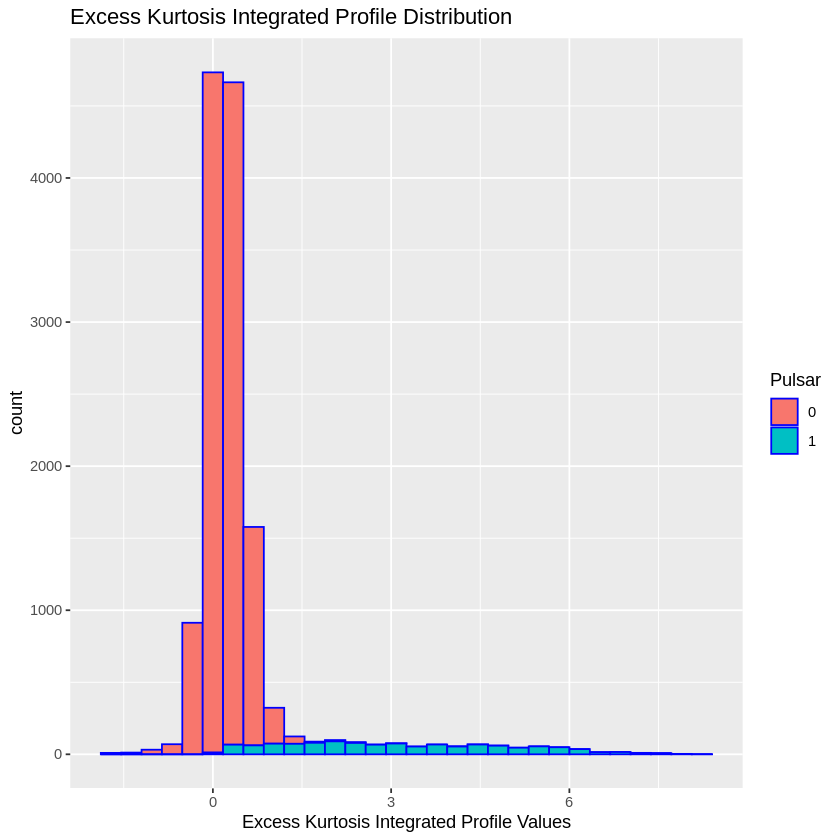

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


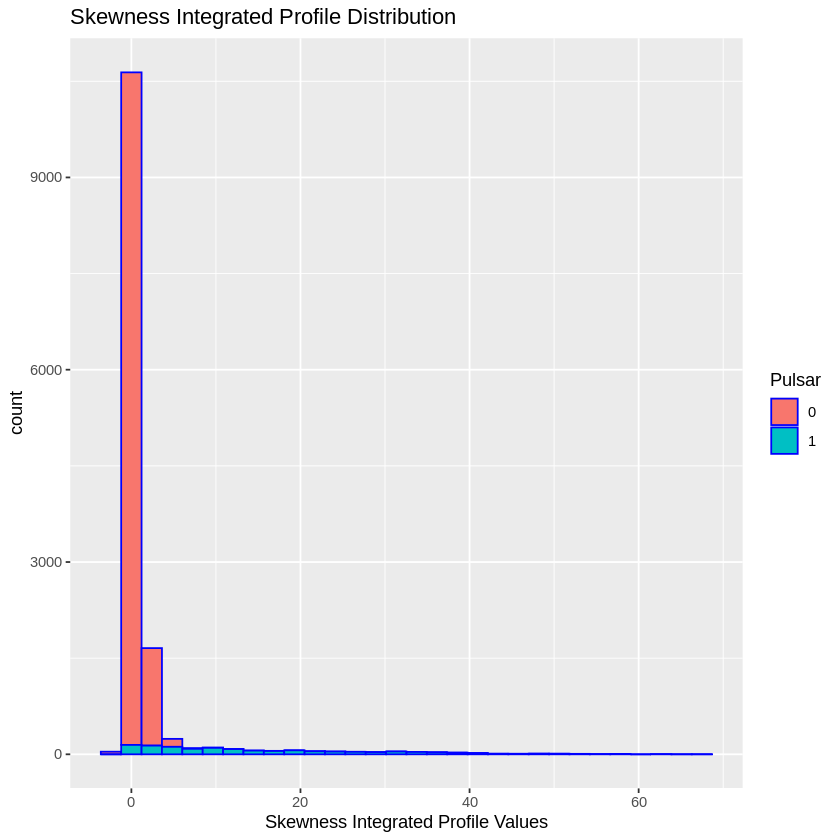

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


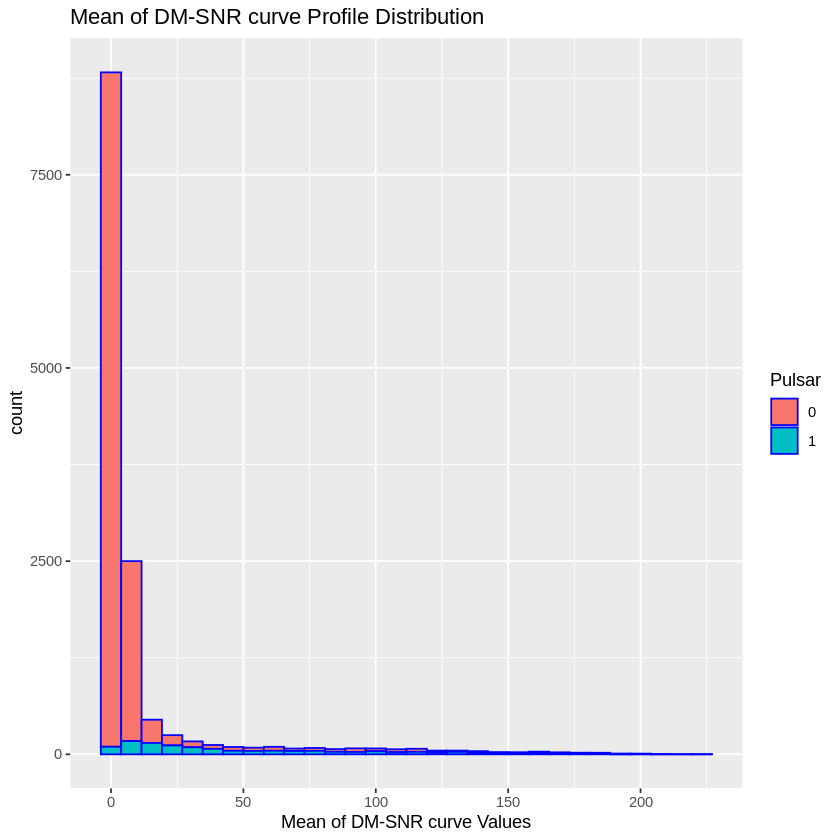

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


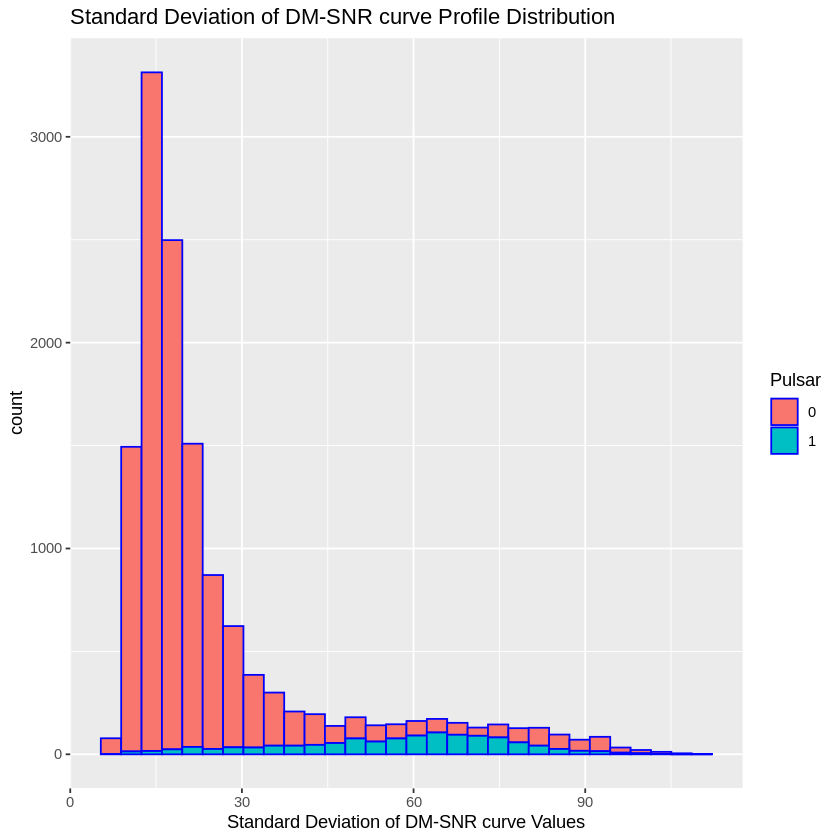

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


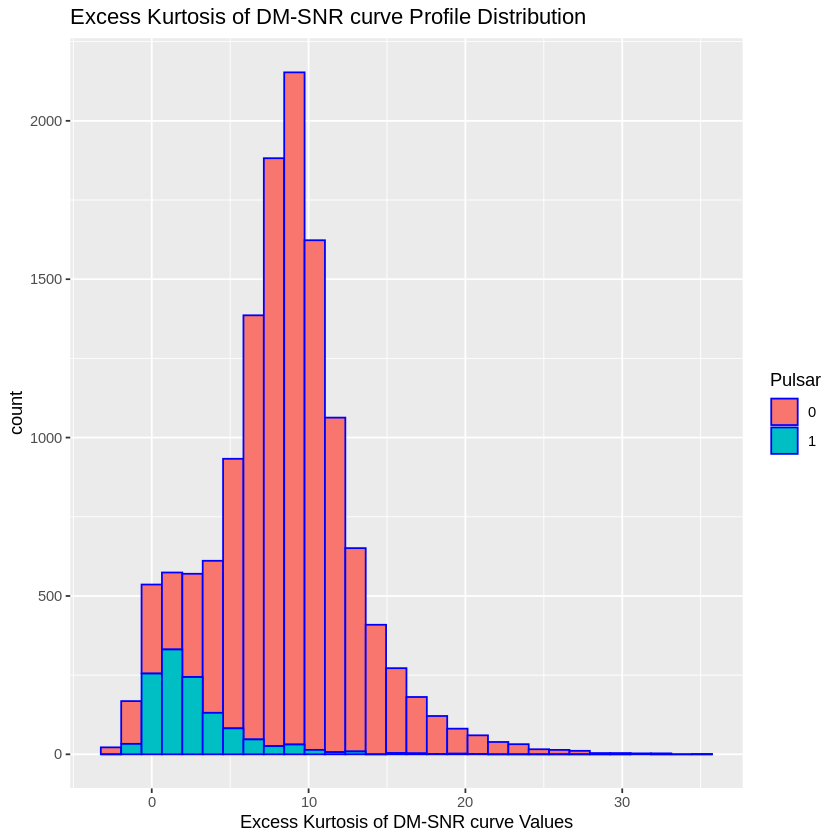

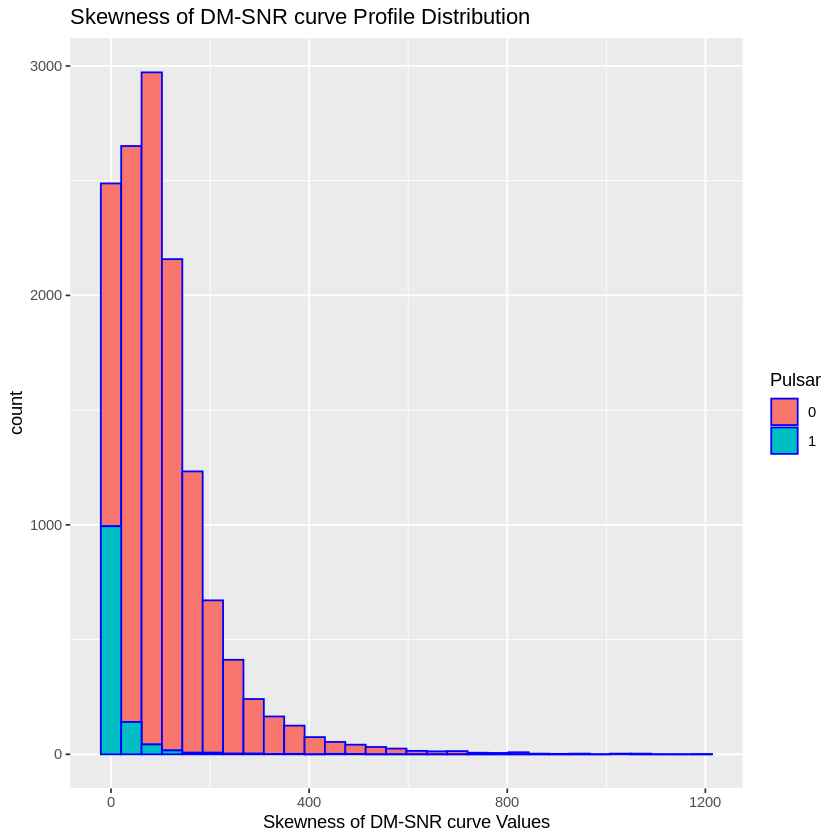

In [74]:
# Summarizing the training data
num_obs_training <- pulsar_training |>
      group_by(is_pulsar) |>
      summarize(n())
num_obs_training

# Means of the predictor variables in training data
predictor_means <- pulsar_training |>
          select(-is_pulsar) |>
          summarize_all(mean)
predictor_means

# NA counts for each column in training data - no missing data in any of the columns
na_counts <- pulsar_training |>
     summarise_all(~ sum(is.na(.)))
na_counts
                             

# training data visualization - distributions of predictor variables
mean_ip_plot <- ggplot(pulsar_training, aes(x = mean_ip, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Mean Integrated Profile Distribution", x = "Mean Integrated Profile Values", fill = "Pulsar")     
mean_ip_plot 

sd_ip_plot <- ggplot(pulsar_training, aes(x = standard_deviation_ip, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Standard Deviation Integrated Profile Distribution", x = "Standard Deviation Integrated Profile Values", fill = "Pulsar")     
sd_ip_plot

excess_kurtosis_ip_plot <- ggplot(pulsar_training, aes(x = excess_kurtosis_ip, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Excess Kurtosis Integrated Profile Distribution", x = "Excess Kurtosis Integrated Profile Values", fill = "Pulsar" )     
excess_kurtosis_ip_plot

skewness_ip_plot <- ggplot(pulsar_training, aes(x = skewness_ip, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Skewness Integrated Profile Distribution", x = "Skewness Integrated Profile Values", fill = "Pulsar" )     
skewness_ip_plot

mean_c_plot <- ggplot(pulsar_training, aes(x = mean_c, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Mean of DM-SNR curve Profile Distribution", x = "Mean of DM-SNR curve Values", fill = "Pulsar" )     
mean_c_plot

sd_c_plot <- ggplot(pulsar_training, aes(x = standard_deviation_c, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Standard Deviation of DM-SNR curve Profile Distribution", x = "Standard Deviation of DM-SNR curve Values", fill = "Pulsar" )     
sd_c_plot

excess_kurtosis_c_plot <- ggplot(pulsar_training, aes(x = excess_kurtosis_c, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Excess Kurtosis of DM-SNR curve Profile Distribution", x = "Excess Kurtosis of DM-SNR curve Values", fill = "Pulsar" )     
excess_kurtosis_c_plot

skewness_c_plot <- ggplot(pulsar_training, aes(x = skewness_c, fill = is_pulsar)) +
  geom_histogram(color = "blue") +
  labs(title = "Skewness of DM-SNR curve Profile Distribution", x = "Skewness of DM-SNR curve Values", fill = "Pulsar" )     
skewness_c_plot

In [75]:
# Summarizing the testing data
num_obs_testing <- pulsar_testing |>
      group_by(is_pulsar) |>
      summarize(n())
num_obs_testing

is_pulsar,n()
<fct>,<int>
0,4058
1,417


<h3>Methods:</h3>

<b>Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?</b>
<br>

- The initial four variables are basic statistics derived from the integrated pulse profile, which represents a continuous array of variables describing a version of the signal that has been averaged both in time and frequency, providing a longitude-resolved perspective. The latter four variables are derived from the DM-SNR curve in a similar manner. All the variables have potential relevance to the task of predicting pulsars. It is important to empirically determine their importance through analysis. We can use Correlation Analysis to calculate the correlation between each variable. Variables with higher absolute correlation values are often more relevant. Depending on the distribution of the data, certain variables may have more direct influence on the target variable. Therefore we will choose 8 variables and make 8 histogram, then compare the distribution and use correlation analysis to determine which variable we will use for our predictors.

- In our data analysis, we will build a K-NN model using the `nearest_neighbor` function from the `tidymodels` package and a recipe to standardize our data.
<br>
<b>Describe at least one way that you will visualize the results</b>
<br>
We can create a confusion matrix to visualize the performance of our classifier. Confusion matrix displays the true positive, true negative, false positive, and false negative counts allowing us to assess the classifier’s accuracy, precision and recall.
<br>
<h3>Expected outcomes and significance:</h3>
<b>What do you expect to find?</b>
<br>
<p>We expect to find how good our K-NN classifier is at predicting whether a star is pulsar or non-pulsar based on our predictor variables.</p>
<b>What impact could such findings have?</b>
<p>If in the end we find that our classifier is appropriate for making such pulsar star classification, we can conclude that the variables selected show distinct differences between pulsar and non-pulsar stars.
Could allow for more efficient classification of stars into either pulsar or non-pulsar categories.
It helps in cataloging and characterizing these celestial objects, contributes to our knowledge of astrophysics and the cosmos. Understanding which objects emit regular signals (pulsars) and which do not (non-pulsars) is important for astrobiology and the study of exoplanets. Pulsar signals can be used to probe the atmospheres of exoplanets and assess their potential habitability.</p>
<b>What future questions could this lead to?</b>
<br>
- How good are other types of classifiers at classifying pulsar and non-pulsar stars?
- How do pulsars evolve over time, and what are the factors influencing their properties?
- What is the distribution of pulsars in our galaxy and beyond?
- How do pulsars interact with their surroundings?
- Are there alternative pathways to pulsar formation, and can they be identified?
